# Analyzing Training, Validation, and Testing Sets

Investigation of the dataset for new reflector short tank data

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Add the path to the parent directory to augment search for module

if "../../.." not in sys.path:
    print("adding pardir")
    sys.path.append("../../..")

from WatChMaL_analysis.short_tank_EDA.old_reflector_short_tank_exploratory_data_analysis.exploratory_data_analysis_utils import *

adding pardir


# Load Data From H5

In [7]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


# Load Indices

In [8]:
idxs_path = './short_dataset_data/equal_indices.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

# Split Datasets

In [9]:
train_angles    = angles[train_idxs]
train_energies  = energies[train_idxs]
train_positions = positions[train_idxs]
train_labels    = labels[train_idxs]

train_info = {'name':'Training Set','energies':train_energies,'positions':train_positions, 'angles':train_angles, 'labels':train_labels}

print("Done train info")

val_angles     = angles[val_idxs]
val_energies   = energies[val_idxs]
val_positions  = positions[val_idxs]
val_labels     = labels[val_idxs]

val_info = {'name':'Validation Set','energies':val_energies,'positions':val_positions, 'angles':val_angles, 'labels':val_labels}

print("Done val info")

test_angles    = angles[test_idxs]
test_energies  = energies[test_idxs]
test_positions = positions[test_idxs]
test_labels    = labels[test_idxs]
test_info = {'name':'Test Set','energies':test_energies,'positions':test_positions, 'angles':test_angles, 'labels':test_labels}

print("Done test info")

Done train info
Done val info
Done test info


In [ ]:
# compute and save event radii
"""
train_radius    = [np.sqrt(train_positions[i,0,0]**2 + train_positions[i,0,2]**2) for i in range(train_positions.shape[0])]
val_radius     = [np.sqrt(val_positions[i,0,0]**2 + val_positions[i,0,2]**2) for i in range(val_positions.shape[0])]
test_radius    = [np.sqrt(test_positions[i,0,0]**2 + test_positions[i,0,2]**2) for i in range(test_positions.shape[0])]

np.savez('./short_dataset_data/event_radii.npz', train_radii=train_radius, val_radii=val_radius, test_radii=test_radius)
"""

In [ ]:
radii_data = np.load('./short_dataset_data/event_radii.npz', allow_pickle=True)

train_info['radius'] = radii_data['train_radii']
val_info['radius']   = radii_data['val_radii']
test_info['radius']  = radii_data['test_radii']

In [10]:
dataset_info = [train_info, val_info, test_info]

# Get indices associated with each dataset and particle type

In [11]:
train_g_idxs = np.where(dataset_info[0]['labels']==0)[0]
val_g_idxs   = np.where(dataset_info[1]['labels']==0)[0]
test_g_idxs  = np.where(dataset_info[2]['labels']==0)[0]

train_e_idxs = np.where(dataset_info[0]['labels']==1)[0]
val_e_idxs   = np.where(dataset_info[1]['labels']==1)[0]
test_e_idxs  = np.where(dataset_info[2]['labels']==1)[0]

train_m_idxs = np.where(dataset_info[0]['labels']==2)[0]
val_m_idxs   = np.where(dataset_info[1]['labels']==2)[0]
test_m_idxs  = np.where(dataset_info[2]['labels']==2)[0]

# Distribution of distance to wall along particle trajectory

In [12]:
# Compute distance to wall for all events
"""
pbar = ProgressBar(widgets=['Calculating Distance to Wall. Progress: ', Percentage(), ' ', Bar(marker='0',left='[',right=']'),
           ' ', ETA()], maxval=reduce(lambda x,y:x+y , list(map(lambda x : x['positions'].shape[0], dataset_info))))

pbar.start()
done=0
for dset in dataset_info:
    d_to_wall = []
    for i in range(dset['positions'].shape[0]):
        pbar.update(done + i)
        d_to_wall.append(distance_to_wall(dset['positions'][i][0], dset['angles'][i]))
        dset['d_to_wall'] = d_to_wall
    done = done + dset['positions'].shape[0]
pbar.finish()

np.savez('./short_dataset_data/dist_to_wall.npz',train_d_to_wall= dataset_info[0]['d_to_wall'],
                            val_d_to_wall  = dataset_info[1]['d_to_wall'],
                            test_d_to_wall = dataset_info[2]['d_to_wall'])
"""

Calculating Distance to Wall. Progress: 100% [000000000000000000] Time: 0:13:42


In [12]:
d_to_wall = np.load('./short_dataset_data/dist_to_wall.npz', allow_pickle=True)

dataset_info[0]['d_to_wall'] = d_to_wall['train_d_to_wall']
dataset_info[1]['d_to_wall'] = d_to_wall['val_d_to_wall']
dataset_info[2]['d_to_wall'] = d_to_wall['test_d_to_wall']

## By particle type and dataset

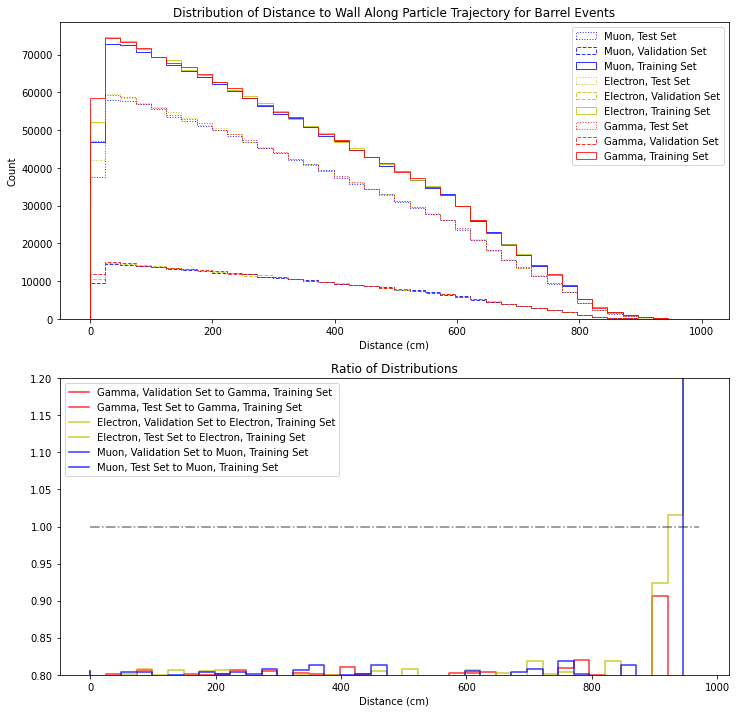

In [13]:
# Plot all distance to wall
patches = plot_compare_dists([
                            dataset_info[0]['d_to_wall'][train_g_idxs], dataset_info[1]['d_to_wall'][val_g_idxs], dataset_info[2]['d_to_wall'][test_g_idxs],
                            dataset_info[0]['d_to_wall'][train_e_idxs], dataset_info[1]['d_to_wall'][val_e_idxs], dataset_info[2]['d_to_wall'][test_e_idxs],
                            dataset_info[0]['d_to_wall'][train_m_idxs], dataset_info[1]['d_to_wall'][val_m_idxs], dataset_info[2]['d_to_wall'][test_m_idxs]],
                            bins=40,
                            numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                            denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                            title='Distribution of Distance to Wall Along Particle Trajectory', 
                            labels=['Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                    'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                    'Muon, Training Set', 'Muon, Validation Set', 'Muon, Test Set'],
                            colors =  ['r','r','r','y','y','y','b','b','b'],
                            linestyle=['-','--',':','-','--',':','-','--',':'], 
                            ratio_range=[0.8,1.2],
                            xlabel='Distance (cm)',
                            normalized=False)

## By event type

In [16]:
"""
pbar = ProgressBar(widgets=['Calculating Event Hit Types. Progress: ', Percentage(), ' ', Bar(marker='0',left='[',right=']'),
           ' ', ETA()], maxval=reduce(lambda x,y:x+y , list(map(lambda x : x['positions'].shape[0], dataset_info))))

pbar.start()
done=0
for dset in dataset_info:
    hit_types = []
    for i in range(dset['positions'].shape[0]):
        pbar.update(done + i)
        hit_types.append(event_hit_type(dset['positions'][i][0], dset['angles'][i]))
    dset['hit_types'] = hit_types
    done = done + dset['positions'].shape[0]
pbar.finish()

np.savez('./short_dataset_data/hit_types.npz',  train_hit_types= dataset_info[0]['hit_types'],
                                                val_hit_types  = dataset_info[1]['hit_types'],
                                                test_hit_types = dataset_info[2]['hit_types'])
"""

"\npbar = ProgressBar(widgets=['Calculating Event Hit Types. Progress: ', Percentage(), ' ', Bar(marker='0',left='[',right=']'),\n           ' ', ETA()], maxval=reduce(lambda x,y:x+y , list(map(lambda x : x['positions'].shape[0], dataset_info))))\n\npbar.start()\ndone=0\nfor dset in dataset_info:\n    hit_types = []\n    for i in range(dset['positions'].shape[0]):\n        pbar.update(done + i)\n        hit_types.append(event_hit_type(dset['positions'][i][0], dset['angles'][i]))\n    dset['hit_types'] = hit_types\n    done = done + dset['positions'].shape[0]\npbar.finish()\n\nnp.savez('./short_dataset_data/hit_types.npz',  train_hit_types= dataset_info[0]['hit_types'],\n                                                val_hit_types  = dataset_info[1]['hit_types'],\n                                                test_hit_types = dataset_info[2]['hit_types'])\n"

In [18]:
hit_type_dict = {'endcap': 0, 'barrel': 1}
hit_types = np.load('./short_dataset_data/hit_types.npz', allow_pickle=True)

dataset_info[0]['hit_types'] = hit_types['train_hit_types']
dataset_info[1]['hit_types'] = hit_types['val_hit_types']
dataset_info[2]['hit_types'] = hit_types['test_hit_types']

In [19]:
# Find all endcap events
endcap_train_idxs = dataset_info[0]['hit_types'] == hit_type_dict['endcap']
endcap_val_idxs   = dataset_info[1]['hit_types'] == hit_type_dict['endcap']
endcap_test_idxs  = dataset_info[2]['hit_types'] == hit_type_dict['endcap']

# Find all barrel events
barrel_train_idxs = dataset_info[0]['hit_types'] == hit_type_dict['barrel']
barrel_val_idxs   = dataset_info[1]['hit_types'] == hit_type_dict['barrel']
barrel_test_idxs  = dataset_info[2]['hit_types'] == hit_type_dict['barrel']

In [20]:
train_e_idxs = np.where(dataset_info[0]['labels']==1)[0]
val_e_idxs   = np.where(dataset_info[1]['labels']==1)[0]
test_e_idxs  = np.where(dataset_info[2]['labels']==1)[0]

train_g_idxs = np.where(dataset_info[0]['labels']==0)[0]
val_g_idxs   = np.where(dataset_info[1]['labels']==0)[0]
test_g_idxs  = np.where(dataset_info[2]['labels']==0)[0]

train_m_idxs = np.where(dataset_info[0]['labels']==2)[0]
val_m_idxs   = np.where(dataset_info[1]['labels']==2)[0]
test_m_idxs  = np.where(dataset_info[2]['labels']==2)[0]

In [21]:
endcap_train_e = (dataset_info[0]['d_to_wall'][train_e_idxs])[endcap_train_idxs[train_e_idxs]]
endcap_val_e   = (dataset_info[1]['d_to_wall'][val_e_idxs])[endcap_val_idxs[val_e_idxs]]
endcap_test_e  = (dataset_info[2]['d_to_wall'][test_e_idxs])[endcap_test_idxs[test_e_idxs]]

endcap_train_g = (dataset_info[0]['d_to_wall'][train_g_idxs])[endcap_train_idxs[train_g_idxs]]
endcap_val_g   = (dataset_info[1]['d_to_wall'][val_g_idxs])[endcap_val_idxs[val_g_idxs]]
endcap_test_g  = (dataset_info[2]['d_to_wall'][test_g_idxs])[endcap_test_idxs[test_g_idxs]]

endcap_train_m = (dataset_info[0]['d_to_wall'][train_m_idxs])[endcap_train_idxs[train_m_idxs]]
endcap_val_m   = (dataset_info[1]['d_to_wall'][val_m_idxs])[endcap_val_idxs[val_m_idxs]]
endcap_test_m  = (dataset_info[2]['d_to_wall'][test_m_idxs])[endcap_test_idxs[test_m_idxs]]

In [22]:
barrel_train_e = (dataset_info[0]['d_to_wall'][train_e_idxs])[barrel_train_idxs[train_e_idxs]]
barrel_val_e   = (dataset_info[1]['d_to_wall'][val_e_idxs])[barrel_val_idxs[val_e_idxs]]
barrel_test_e  = (dataset_info[2]['d_to_wall'][test_e_idxs])[barrel_test_idxs[test_e_idxs]]

barrel_train_g = (dataset_info[0]['d_to_wall'][train_g_idxs])[barrel_train_idxs[train_g_idxs]]
barrel_val_g   = (dataset_info[1]['d_to_wall'][val_g_idxs])[barrel_val_idxs[val_g_idxs]]
barrel_test_g  = (dataset_info[2]['d_to_wall'][test_g_idxs])[barrel_test_idxs[test_g_idxs]]

barrel_train_m = (dataset_info[0]['d_to_wall'][train_m_idxs])[barrel_train_idxs[train_m_idxs]]
barrel_val_m   = (dataset_info[1]['d_to_wall'][val_m_idxs])[barrel_val_idxs[val_m_idxs]]
barrel_test_m  = (dataset_info[2]['d_to_wall'][test_m_idxs])[barrel_test_idxs[test_m_idxs]]


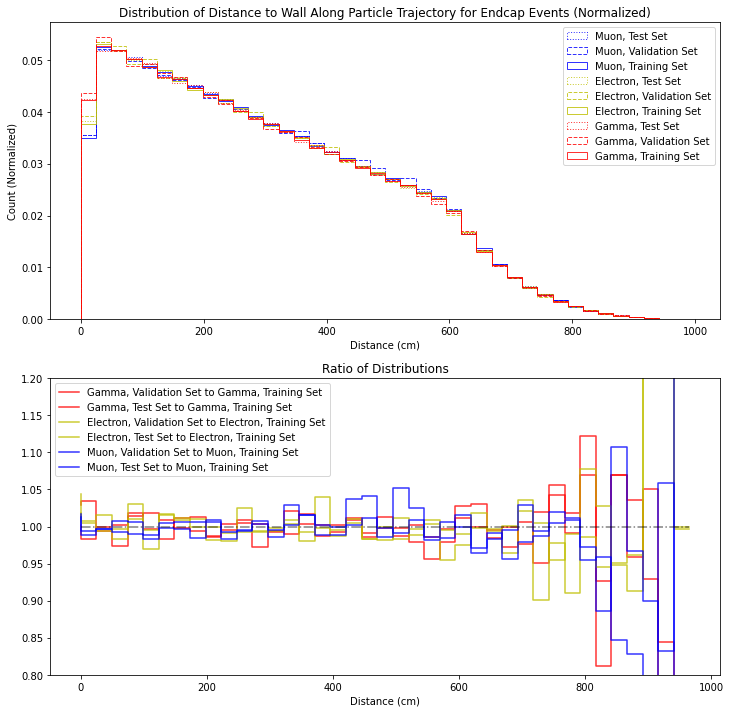

In [23]:
# Plot distance to wall histogram for endcap events
patches = plot_compare_dists([endcap_train_g, endcap_val_g, endcap_test_g,
                              endcap_train_e, endcap_val_e, endcap_test_e,
                              endcap_train_m, endcap_val_m, endcap_test_m],
                            bins=40,
                            numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                            denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                            title='Distribution of Distance to Wall Along Particle Trajectory for Endcap Events', 
                            labels=['Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                    'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                    'Muon, Training Set', 'Muon, Validation Set', 'Muon, Test Set'],
                            colors =  ['r','r','r','y','y','y','b','b','b'],
                            linestyle=['-','--',':','-','--',':','-','--',':'], 
                            ratio_range=[0.8,1.2],
                            xlabel='Distance (cm)'
                            )

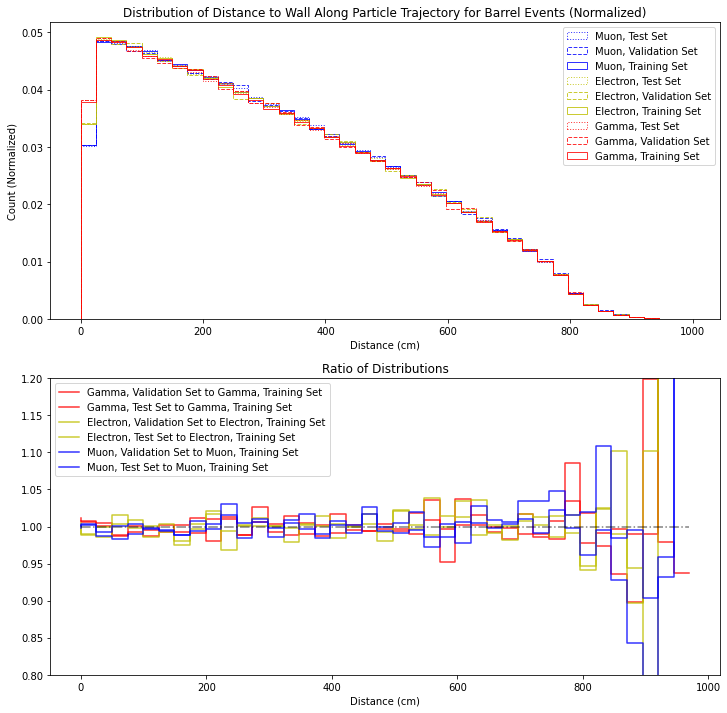

In [24]:
# Plot distance to wall histogram for barrel events
patches = plot_compare_dists([barrel_train_g, barrel_val_g, barrel_test_g,
                              barrel_train_e, barrel_val_e, barrel_test_e,
                              barrel_train_m, barrel_val_m, barrel_test_m],
                            bins=40,
                            numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                            denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                            title='Distribution of Distance to Wall Along Particle Trajectory for Barrel Events', 
                            labels=['Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                    'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                    'Muon, Training Set', 'Muon, Validation Set', 'Muon, Test Set'],
                            colors =  ['r','r','r','y','y','y','b','b','b'],
                            linestyle=['-','--',':','-','--',':','-','--',':'], 
                            ratio_range=[0.8,1.2],
                            xlabel='Distance (cm)')

No handles with labels found to put in legend.


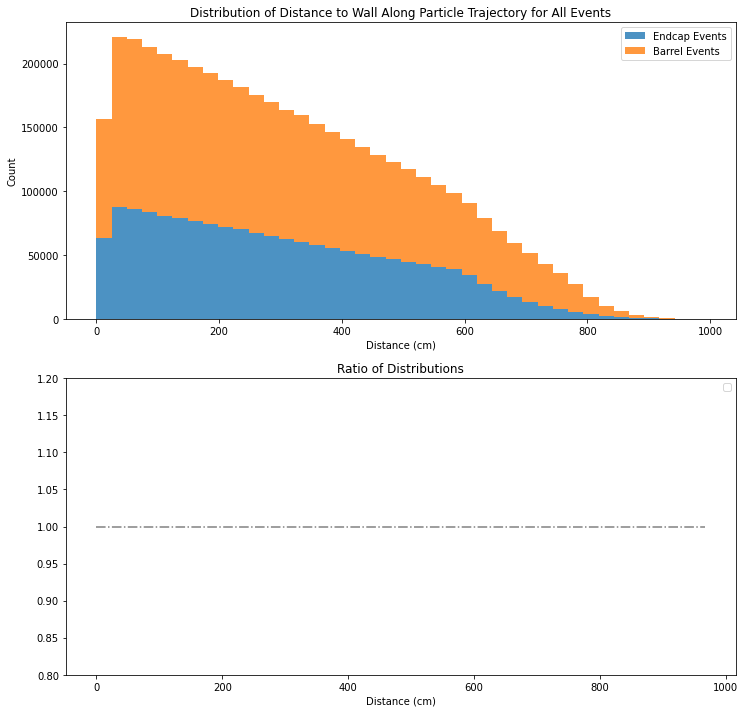

In [25]:
# Plot stacked hist for training set
patches = plot_compare_dists([
                            dataset_info[0]['d_to_wall'][endcap_train_idxs],
                            dataset_info[0]['d_to_wall'][barrel_train_idxs]],
                            bins=40,
                            numerator_dist_idxs   = [],
                            denominator_dist_idxs = [],
                            labels=['Endcap Events', 'Barrel Events'],
                            title='Distribution of Distance to Wall Along Particle Trajectory for All Events',
                            ratio_range=[0.8,1.2],
                            xlabel='Distance (cm)',
                            normalized=False,
                            histtype='barstacked')